In [3]:
import pandas as pd

data = pd.read_csv('../datasets/hr.csv')
# using data.copy() to create a new DataFrame, keeping the original data intact
df = pd.DataFrame(data)
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [5]:
# Dataset Description - Exploring the dataset
# We're starting to gain some insights about the data especially the data types of the columns
print(f"Shape of dataset: {df.shape}")
print("Columns in the dataset:")
print(df.info())

Shape of dataset: (311, 36)
Columns in the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null

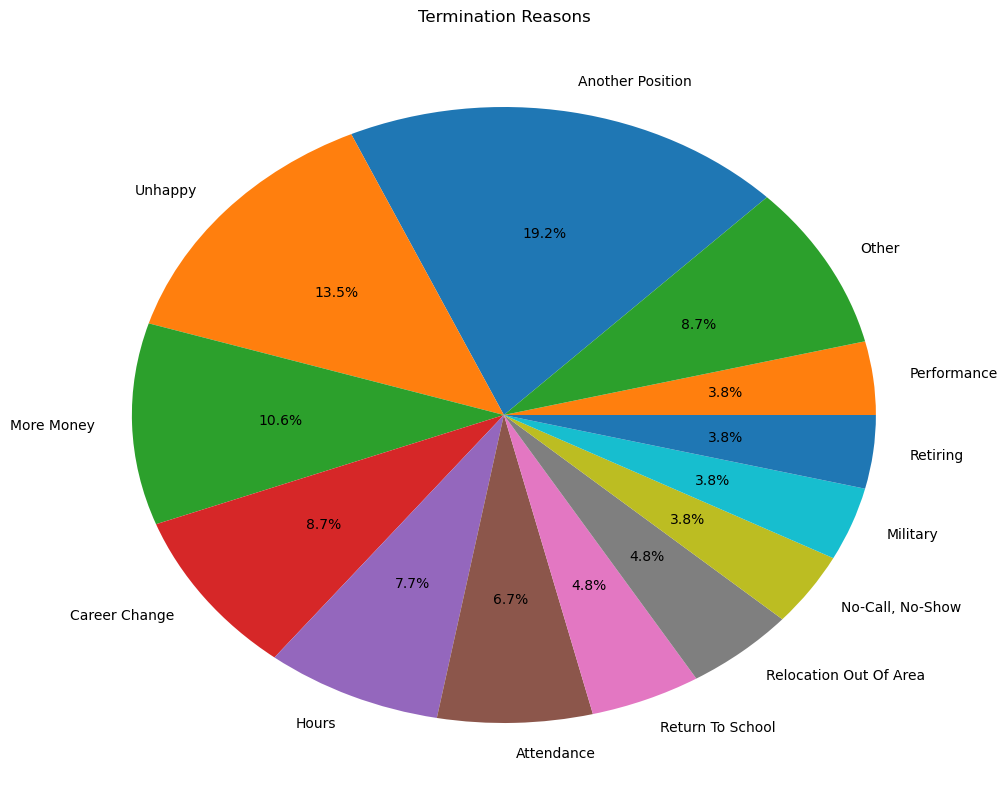

In [6]:
# ---- Visualizations ----

# Now, we familiarize the readers with the dataset through some informative statistics and charts.
import matplotlib.pyplot as plt
import seaborn as sns

# Turnover reasons distribution

# excluding "Still Employed" from the TermReason column for clearer visualization
# they're already working why show?
turnover_reasons = df['TermReason'].value_counts()
turnover_reasons = turnover_reasons[turnover_reasons.index != 'N/A-StillEmployed']

total = turnover_reasons.sum()
percentages = (turnover_reasons / total) * 100

# grouping categories with less than 3% into "Other" for better visualization
filtered_reasons = percentages[percentages >= 3]
filtered_reasons['Other'] = percentages[percentages < 3].sum()

filtered_reasons.index = filtered_reasons.index.str.title()

plt.figure(figsize=(12, 10))
ax = filtered_reasons.plot.pie(autopct='%1.1f%%', startangle=45,)
ax.set_aspect('auto')
plt.title('Termination Reasons')
plt.ylabel('')
plt.show()

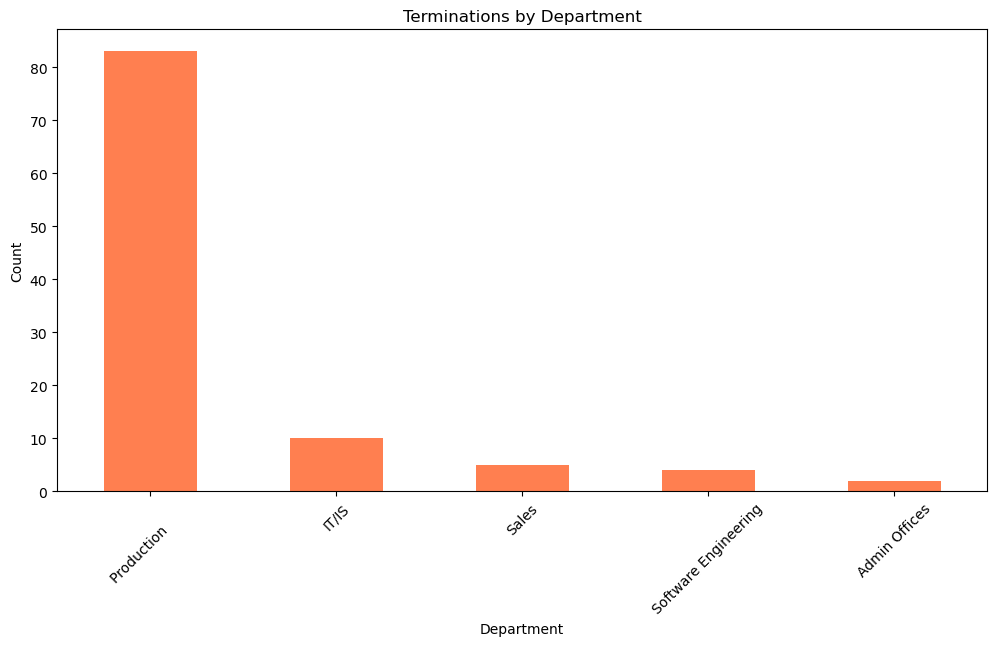

In [7]:
# Termination counts by department
department_termination = df[df['Termd'] == 1]['Department'].value_counts()

plt.figure(figsize=(12, 6))
department_termination.plot(kind='bar', color='coral')
plt.title('Terminations by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

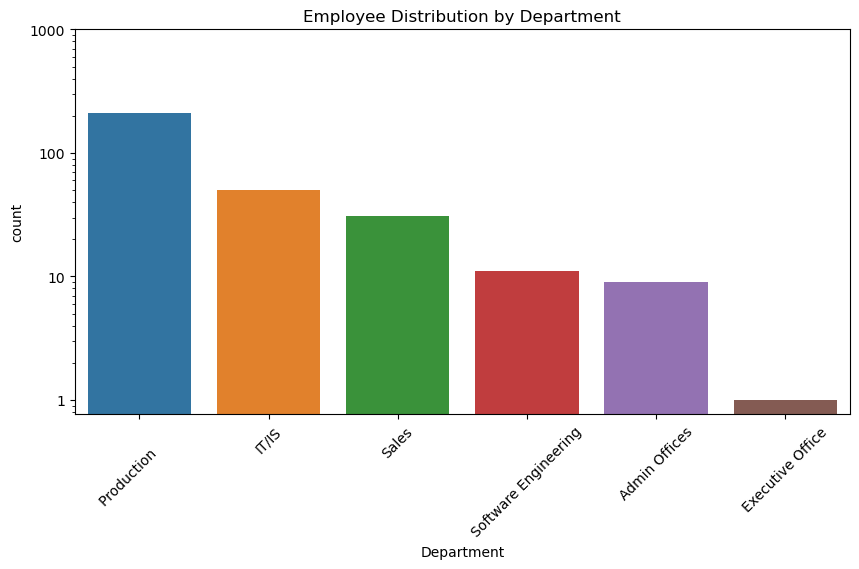

In [8]:
# Employee distribution by department
plt.figure(figsize=(10, 5))
sns.countplot(x='Department', data=df, order=df['Department'].value_counts().index)
plt.yscale('log') # Thanks to logarithmic scale, we can see the distribution of employees clearer even in the departments with fewer employees
log_ticks = [1, 10, 100, 1000]
plt.yticks(log_ticks, [str(tick) for tick in log_ticks])  # Showing count values as integers

plt.title('Employee Distribution by Department')
plt.xticks(rotation=45)
plt.show()

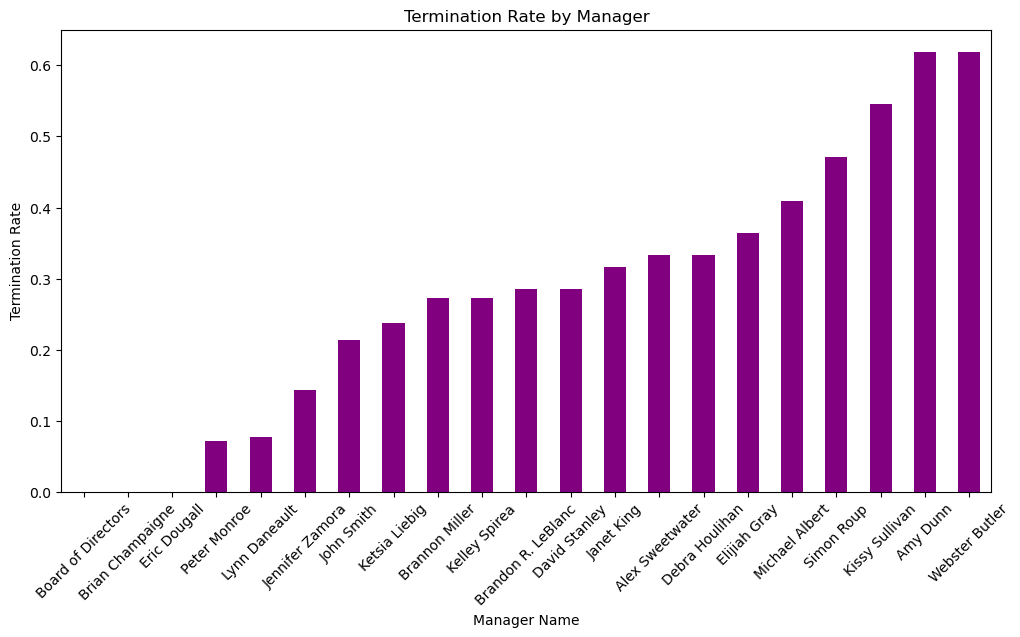

In [9]:
# Termination rate by manager

manager_termination_rate = df.groupby('ManagerName')['Termd'].mean().sort_values()

plt.figure(figsize=(12, 6))
manager_termination_rate.plot(kind='bar', color='purple')
plt.title('Termination Rate by Manager')
plt.xlabel('Manager Name')
plt.ylabel('Termination Rate')
plt.xticks(rotation=45)
plt.show()

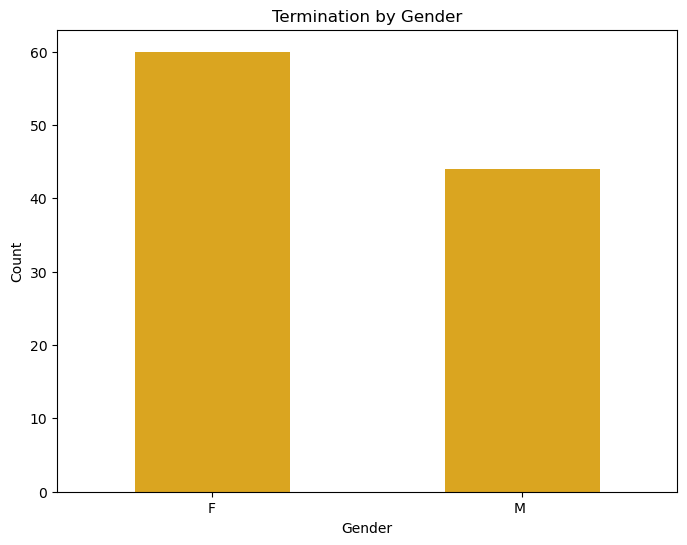

In [10]:
# Termination count by gender
gender_termination = df[df['Termd'] == 1]['Sex'].value_counts()

plt.figure(figsize=(8, 6))
gender_termination.plot(kind='bar', color='goldenrod')
plt.title('Termination by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

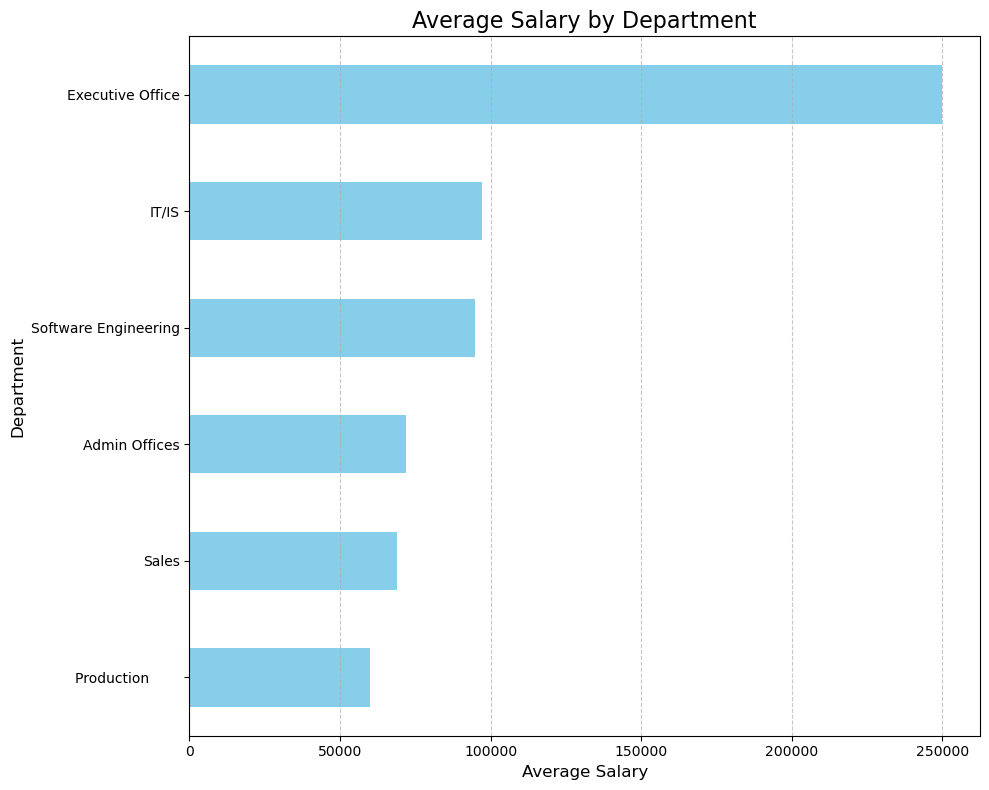

In [11]:
# Grouping by Department and calculating average salary
avg_salary_by_department = df.groupby('Department')['Salary'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 8))
avg_salary_by_department.plot(kind='barh', color='skyblue')
plt.title('Average Salary by Department', fontsize=16)
plt.xlabel('Average Salary', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

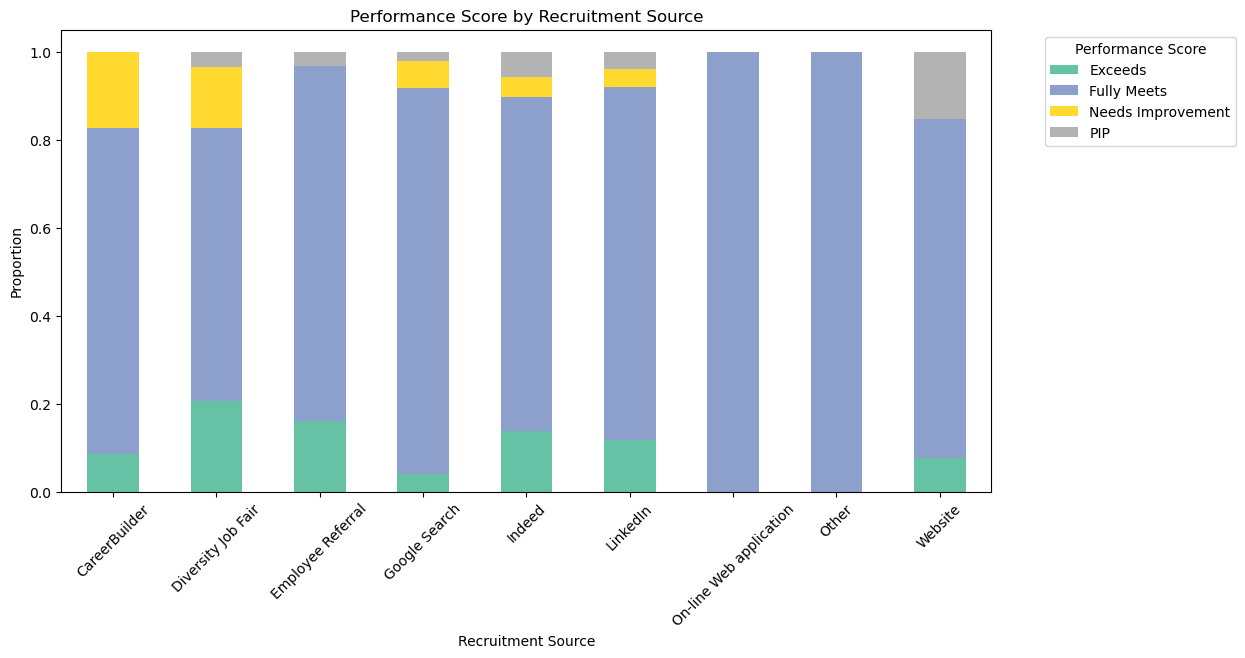

In [12]:
# --- Performance Score by Recruitment Source ---
plt.figure(figsize=(12, 6))
recruitment_effectiveness = df.groupby('RecruitmentSource')['PerformanceScore'].value_counts(normalize=True).unstack().fillna(0)

recruitment_effectiveness.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Performance Score by Recruitment Source')
plt.ylabel('Proportion')
plt.xlabel('Recruitment Source')
plt.legend(title='Performance Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Data Preprocessing
# -----------------------------------
# Data Cleaning
# -----------------------------------

# We're checking for missing values before cleaning process
print("Missing values per column before cleaning:")
print(df.isnull().sum())

# we see a large number of missing values in 'DateofTermination' column due to employees who are still employed
# creating a new column called 'IsTerminated' and one-hot encoding
df['IsTerminated'] = df['DateofTermination'].isnull().astype(int)
# deleting the DateofTermination since we now have one hot encoded 'IsTerminated' column.
df.drop(columns=['DateofTermination'], inplace=True)

# Dropping irrelevant ID-related columns
# There are a plenty of ID columns that dont have any meaningful contribution to our model and the prediction.
# Some of them are MarriedID, MarialStatusID, DeptID and so on and so forth. Here we're dropping them.
id_columns = [col for col in df.columns if col.endswith('ID')]

# Also there's a column named 'Hispanic Latino' which includes boolean 'Yes' and 'No' values. We believe that this column also should be dropped since it doesnt actually provide insight for model.
hispanic_latino = ['HispanicLatino']
columns_to_drop = id_columns + hispanic_latino

df_prod = df.drop(columns=columns_to_drop)

# Displaying remaining columns
print("Remaining columns after dropping ID-related columns:")
print(len(df_prod.columns))

print("Missing values per column: after cleaning: ")
print(df_prod.isnull().sum())

Missing values per column before cleaning:
Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
Recru

In [14]:
# --- Data Transformation ---
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# List of categorical columns
categorical_columns = ['Department', 'State', 'Position', 'TermReason', 'EmploymentStatus',
                       'ManagerName', 'PerformanceScore', 'RecruitmentSource',
                       'Sex', 'MaritalDesc', 'CitizenDesc', 'RaceDesc']

label_encoders = {}

# Encode each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    df_prod[col] = le.fit_transform(df_prod[col])
    label_encoders[col] = le  # Store encoder for inverse transformations if needed later

# one hot encoder cok fazla ekstra column ekliyor, ama label encoder da rank sorunlari olabilir. napalim
'''
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# One-Hot Encoding
# TODO: check if all the listed categorical columns (['Department', 'State', ...]) are necessary for your model. Remove columns with low variance or high cardinality if they don't add value.
categorical_columns = ['Department', 'State', 'Position', 'TermReason', 'EmploymentStatus',
                       'ManagerName', 'PerformanceScore', 'RecruitmentSource',
                       'Sex', 'MaritalDesc', 'CitizenDesc', 'RaceDesc']

# not enabling sparse_output and it will be a dense array.
# this is useful because we're immediately converting the output into a DataFrame later
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fitting and transforming the categorical columns
encoded_data = encoder.fit_transform(df_prod[categorical_columns])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

df_prod = pd.concat([df_prod, encoded_df], axis=1)
df_prod.drop(columns=categorical_columns, inplace=True)
'''

"\nfrom sklearn.preprocessing import LabelEncoder, OneHotEncoder\n\n# One-Hot Encoding\n# TODO: check if all the listed categorical columns (['Department', 'State', ...]) are necessary for your model. Remove columns with low variance or high cardinality if they don't add value.\ncategorical_columns = ['Department', 'State', 'Position', 'TermReason', 'EmploymentStatus',\n                       'ManagerName', 'PerformanceScore', 'RecruitmentSource',\n                       'Sex', 'MaritalDesc', 'CitizenDesc', 'RaceDesc']\n\n# not enabling sparse_output and it will be a dense array.\n# this is useful because we're immediately converting the output into a DataFrame later\nencoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')\n\n# Fitting and transforming the categorical columns\nencoded_data = encoder.fit_transform(df_prod[categorical_columns])\n\nencoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))\n\ndf_prod = pd.concat([df_p

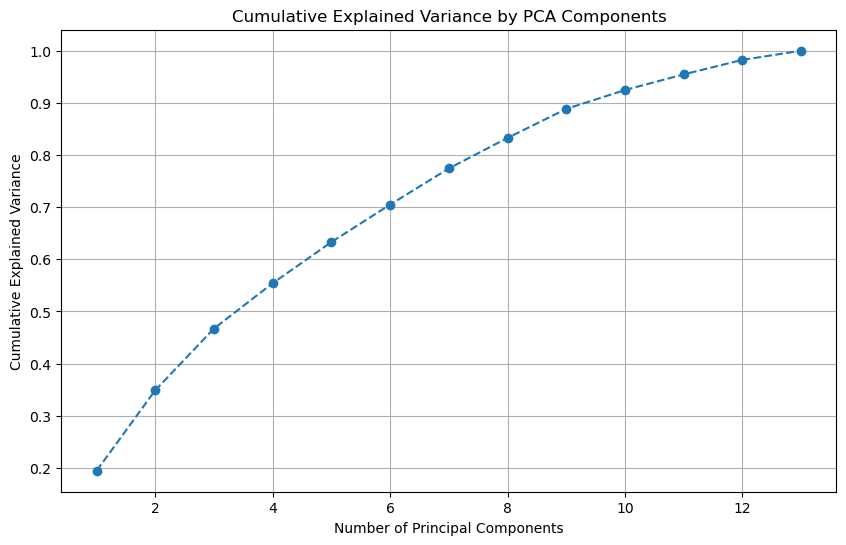

Number of components to retain 95% variance: 12
Shape of dataset after PCA: (311, 13)


In [30]:
# --- Data Reduction / Feature Engineering ---
# After cleaning and transforming the data as a last step we'll do data reduction before we move on with ML inference section.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Our target variable is 'IsTerminated' since our main goal is to predict employee retention.
target = 'IsTerminated'

#  Termination reason and Terminasion type features should not be used for training the model because these features are results. They're not predictors.
features = [
    'Salary', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
    'PerformanceScore', 'DaysLateLast30', 'Department', 'EmploymentStatus',
    'TermReason', 'RecruitmentSource', 'Position', 'RaceDesc', 'Sex'
]

# Splitting features and target
X = df_prod[features]
y = df_prod[target]

# Splitting the dataset into training, validation, and testing sets.
# In this way we can detect possible overfitting, underfitting situations.
# k-fold cross-validation ??!?!?!?!?
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardizing the features (important for KNN, Logistic Regression, and Neural Network and other ML models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Standardizing numerical columns for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_columns])

# 3. Applying the PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 4. Visualizing explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# 5. Selecting the number of components to retain 98% variance
explained_variance = 0.98
n_components = next(i for i, cumulative_variance in enumerate(pca.explained_variance_ratio_.cumsum()) if cumulative_variance >= explained_variance) + 1
print(f"Number of components to retain 95% variance: {n_components}")

# 6. Reducing the dataset using the selected number of components
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)

# 7. Creating a DataFrame with the reduced components
X_pca_df = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(n_components)])
X_pca_df[target] = y  # Adding the target column back for further modeling

print(f"Shape of dataset after PCA: {X_pca_df.shape}")


In [16]:
# 4. MACHINE LEARNING IN ACTION

# https://www.kaggle.com/code/dredlaw/predict-employment-termination/notebook
# https://www.kaggle.com/datasets/HRAnalyticRepository/employee-attrition-data/data
!pip install ray[tune]
!pip install lightgbm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from ray import tune
from ray import train
import ray
import warnings
warnings.filterwarnings("ignore")

zsh:1: no matches found: ray[tune]

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


ModuleNotFoundError: No module named 'xgboost'

In [26]:
# https://www.kaggle.com/code/khaledsoliman/exploratory-data-analysis-termination-prediction

# lighgbm is one of the most used in especially kaggle competitions
# its emerged to reduce the training duration in xgboost. will compare!!!
'''
models = {
    'Neural Network': MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    print(model_name + " has been trained.")


for model_name, model in models.items():
    print(model_name + " Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
'''
# as a first step knn
def train_knn(config, X_train, y_train, X_test, y_test):
    model = KNeighborsClassifier(n_neighbors=config["n_neighbors"], weights=config["weights"], metric=config["metric"])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    tune.report(accuracy=accuracy)

In [13]:
def train_rf(config, X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(
        n_estimators=config["n_estimators"],
        max_depth=config["max_depth"],
        min_samples_split=config["min_samples_split"],
        min_samples_leaf=config["min_samples_leaf"]
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    tune.report(accuracy=accuracy)

In [3]:
def train_xgb(config, X_train, y_train, X_test, y_test):
    model = XGBClassifier(
        n_estimators=config["n_estimators"],
        learning_rate=config["learning_rate"],
        max_depth=config["max_depth"],
        subsample=config["subsample"],
        colsample_bytree=config["colsample_bytree"]
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    tune.report(accuracy=accuracy)

In [17]:
def train_lgbm(config, X_train, y_train, X_test, y_test):
    model = LGBMClassifier(
        n_estimators=config["n_estimators"],
        learning_rate=config["learning_rate"],
        max_depth=config["max_depth"],
        num_leaves=config["num_leaves"],
        colsample_bytree=config["colsample_bytree"]
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    tune.report(accuracy=accuracy)

In [19]:
# --- Defining the Search Space for Hyperparameters ---
search_space_knn = {
    "n_neighbors": tune.choice([3, 5, 7, 9]),
    "weights": tune.choice(["uniform", "distance"]),
    "metric": tune.choice(["euclidean", "manhattan"]),
}

search_space_rf = {
    "n_estimators": tune.choice([100, 200, 300]),
    "max_depth": tune.choice([None, 10, 20, 30]),
    "min_samples_split": tune.choice([2, 5, 10]),
    "min_samples_leaf": tune.choice([1, 2, 4]),
}

search_space_xgb = {
    "n_estimators": tune.choice([100, 200, 300]),
    "learning_rate": tune.choice([0.01, 0.05, 0.1]),
    "max_depth": tune.choice([3, 6, 9]),
    "subsample": tune.choice([0.7, 0.8, 1.0]),
    "colsample_bytree": tune.choice([0.7, 0.8, 1.0]),
}

search_space_lgbm = {
    "n_estimators": tune.choice([100, 200, 300]),
    "learning_rate": tune.choice([0.01, 0.0, 0.1]),
    "max_depth": tune.choice([10, 20, 30]),
    "num_leaves": tune.choice([31, 50, 100]),
    "colsample_bytree": tune.choice([0.7, 0.8, 1.0]),
}

NameError: name 'tune' is not defined

In [21]:
# --- Start Ray for Hyperparameter Tuning ---
ray.init(ignore_reinit_error=True)

# Hyperparameter tuning for KNN
tune.run(
    tune.with_parameters(train_knn, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test),
    config=search_space_knn,
    num_samples=10,  # Number of trials
    resources_per_trial={"cpu": 1},
    name="knn_tuning"
)

# Hyperparameter tuning for Random Forest
tune.run(
    tune.with_parameters(train_rf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test),
    config=search_space_rf,
    num_samples=10,
    resources_per_trial={"cpu": 1},
    name="rf_tuning"
)

# Hyperparameter tuning for XGBoost
tune.run(
    tune.with_parameters(train_xgb, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test),
    config=search_space_xgb,
    num_samples=10,
    resources_per_trial={"cpu": 1},
    name="xgb_tuning"
)

# Hyperparameter tuning for LightGBM
tune.run(
    tune.with_parameters(train_lgbm, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test),
    config=search_space_lgbm,
    num_samples=10,
    resources_per_trial={"cpu": 1},
    name="lgbm_tuning"
)


NameError: name 'ray' is not defined

In [23]:
# ---- Performance Measurement -----
# Describe the process with the definitions of the metrics employed.
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

def evaluate_model(y_test, y_pred):
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Precision
    precision = precision_score(y_test, y_pred)

    # Recall
    recall = recall_score(y_test, y_pred)

    # F1-Score
    f1 = f1_score(y_test, y_pred)

    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Classification Report
    class_report = classification_report(y_test, y_pred)

    print("Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

    return accuracy, precision, recall, f1, roc_auc, conf_matrix, class_report

In [25]:
# Evaluate the best model after tuning (example with XGBoost)
best_model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
evaluate_model(y_test, y_pred)

NameError: name 'XGBClassifier' is not defined

In [27]:
# 4.4. Results
#Share the key results without discussing them . This section should be based on facts.

In [28]:
# 5. Insights
# -----------
# Insights derived from the results
# like some of these gpt generated typeshit responses:
# - Random Forest and LightGBM performed the best with high accuracy and F1-scores.
# - The neural network showed competitive performance, with slight overfitting.
# - The confusion matrix highlights potential issues with false positives.